In [29]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import geopandas as gpd
import plotly.express as px
from matplotlib.font_manager import FontProperties
from IPython.display import HTML as html_print
from termcolor import colored
from scipy import stats

In [30]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [31]:
df_3 = pd.read_csv('03 modern-renewable-prod.csv')

In [32]:
df_3.head()

,Entity,Code,Year,Electricity from wind (TWh),Electricity from hydro (TWh),Electricity from solar (TWh),Other renewables including bioenergy (TWh)
0,Afghanistan,AFG,2000,0.000,0.310,0.000,0.000
1,Afghanistan,AFG,2001,0.000,0.500,0.000,0.000
2,Afghanistan,AFG,2002,0.000,0.560,0.000,0.000
3,Afghanistan,AFG,2003,0.000,0.630,0.000,0.000
4,Afghanistan,AFG,2004,0.000,0.560,0.000,0.000


In [33]:
df_3.tail()

,Entity,Code,Year,Electricity from wind (TWh),Electricity from hydro (TWh),Electricity from solar (TWh),Other renewables including bioenergy (TWh)
8846,Zimbabwe,ZWE,2017,0.000,3.970,0.010,0.320
8847,Zimbabwe,ZWE,2018,0.000,5.050,0.020,0.390
8848,Zimbabwe,ZWE,2019,0.000,4.170,0.030,0.380
8849,Zimbabwe,ZWE,2020,0.000,3.810,0.030,0.350
8850,Zimbabwe,ZWE,2021,0.000,4.000,0.040,0.380


In [34]:
def print_section_title(title):
    print(colored(title, 'blue', attrs=['bold', 'underline']))

def display_head_and_tail(dataframe, head=5):
    display(dataframe.head(head).style.set_caption("Head"))
    display(dataframe.tail(head).style.set_caption("Tail"))

def display_na(dataframe):
    na_df = dataframe.isnull().sum().reset_index()
    na_df.columns = ['Column', 'Number of NA']
    display(na_df.style.set_caption("Number of NA Values"))

def display_quantiles(dataframe):
    quantiles_df = dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T
    display(quantiles_df.style.format("{:.2f}").set_caption("Quantiles"))

def check_df(dataframe, head=5):
    print_section_title('Shape')
    print(dataframe.shape)
    print_section_title('Types')
    print(dataframe.dtypes.to_frame('Data Type').style.set_caption("Data Types"))
    print_section_title('Head & Tail')
    display_head_and_tail(dataframe, head)
    print_section_title('NA Values')
    display_na(dataframe)
    print_section_title('Quantiles')
    display_quantiles(dataframe)

check_df(df_3)

Shape
(8851, 7)
Types
Head & Tail


,Entity,Code,Year,Electricity from wind (TWh),Electricity from hydro (TWh),Electricity from solar (TWh),Other renewables including bioenergy (TWh)
0,Afghanistan,AFG,2000,0.000000,0.310000,0.000000,0.000000
1,Afghanistan,AFG,2001,0.000000,0.500000,0.000000,0.000000
2,Afghanistan,AFG,2002,0.000000,0.560000,0.000000,0.000000
3,Afghanistan,AFG,2003,0.000000,0.630000,0.000000,0.000000
4,Afghanistan,AFG,2004,0.000000,0.560000,0.000000,0.000000


,Entity,Code,Year,Electricity from wind (TWh),Electricity from hydro (TWh),Electricity from solar (TWh),Other renewables including bioenergy (TWh)
8846,Zimbabwe,ZWE,2017,0.000000,3.970000,0.010000,0.320000
8847,Zimbabwe,ZWE,2018,0.000000,5.050000,0.020000,0.390000
8848,Zimbabwe,ZWE,2019,0.000000,4.170000,0.030000,0.380000
8849,Zimbabwe,ZWE,2020,0.000000,3.810000,0.030000,0.350000
8850,Zimbabwe,ZWE,2021,0.000000,4.000000,0.040000,0.380000


NA Values


,Column,Number of NA
0,Entity,0
1,Code,1555
2,Year,0
3,Electricity from wind (TWh),175
4,Electricity from hydro (TWh),11
5,Electricity from solar (TWh),168
6,Other renewables including bioenergy (TWh),220


Quantiles


,count,mean,std,min,0%,5%,50%,95%,99%,100%,max
Year,8851.00,1999.91,15.75,1965.00,1965.00,1969.00,2004.00,2020.00,2021.00,2022.00,2022.00
Electricity from wind (TWh),8676.00,14.57,86.39,0.00,0.00,0.00,0.00,35.82,433.23,1848.26,1848.26
Electricity from hydro (TWh),8840.00,116.58,360.23,0.00,0.00,0.00,3.53,697.49,1861.13,4340.61,4340.61
Electricity from solar (TWh),8683.00,5.28,40.10,0.00,0.00,0.00,0.00,5.33,158.19,1040.50,1040.50
Other renewables including bioenergy (TWh),8631.00,12.24,48.35,0.00,0.00,0.00,0.02,76.41,243.76,761.93,761.93


In [35]:
df_3 = df_3.drop(columns=['Code'])

In [36]:
df_3.head()

,Entity,Year,Electricity from wind (TWh),Electricity from hydro (TWh),Electricity from solar (TWh),Other renewables including bioenergy (TWh)
0,Afghanistan,2000,0.000,0.310,0.000,0.000
1,Afghanistan,2001,0.000,0.500,0.000,0.000
2,Afghanistan,2002,0.000,0.560,0.000,0.000
3,Afghanistan,2003,0.000,0.630,0.000,0.000
4,Afghanistan,2004,0.000,0.560,0.000,0.000


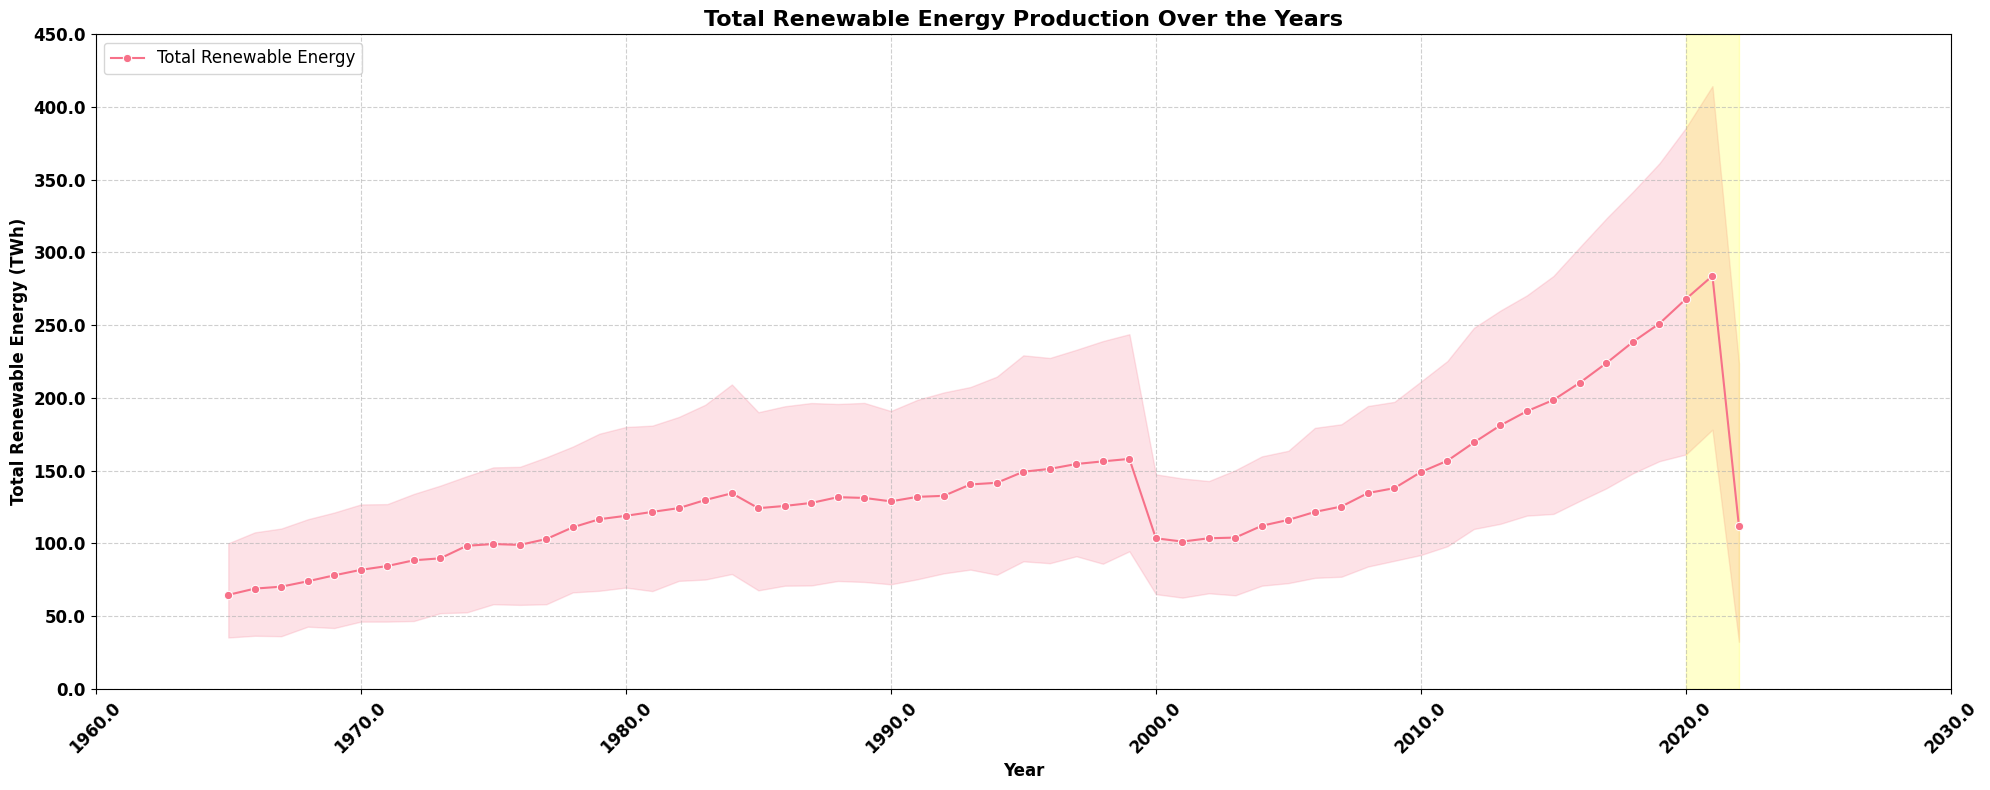

In [37]:
df_3['Total Renewable (TWh)'] = df_3[['Electricity from wind (TWh)', 'Electricity from hydro (TWh)', 'Electricity from solar (TWh)', 'Other renewables including bioenergy (TWh)']].sum(axis=1)

colors = sns.color_palette("husl")

fig, ax = plt.subplots(figsize=(20, 8))

sns.lineplot(x='Year', y='Total Renewable (TWh)', data=df_3, marker='o', color=colors[0], ax=ax, label='Total Renewable Energy')

max_point = df_3[df_3['Total Renewable (TWh)'] == df_3['Total Renewable (TWh)'].max()]
ax.annotate(f"Max: {max_point['Year'].values[0]}",
            xy=(max_point['Year'].values[0], max_point['Total Renewable (TWh)'].values[0]),
            xytext=(-50, 50),
            textcoords='offset points',
            arrowprops=dict(arrowstyle='->', color='black', lw=1),
            fontsize=12)

plt.title('Total Renewable Energy Production Over the Years', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Total Renewable Energy (TWh)', fontsize=12, fontweight='bold')

plt.grid(True, linestyle='--', alpha=0.6)

plt.legend(fontsize=12)
ax.axvspan(max_point['Year'].values[0] - 1, max_point['Year'].values[0] + 1, alpha=0.2, color='yellow')

font = FontProperties()
font.set_weight('bold')
ax.set_xticks(ax.get_xticks())
ax.set_yticks(ax.get_yticks())
ax.set_xticklabels(ax.get_xticks(), fontproperties=font)
ax.set_yticklabels(ax.get_yticks(), fontproperties=font)

plt.xticks(rotation=45, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

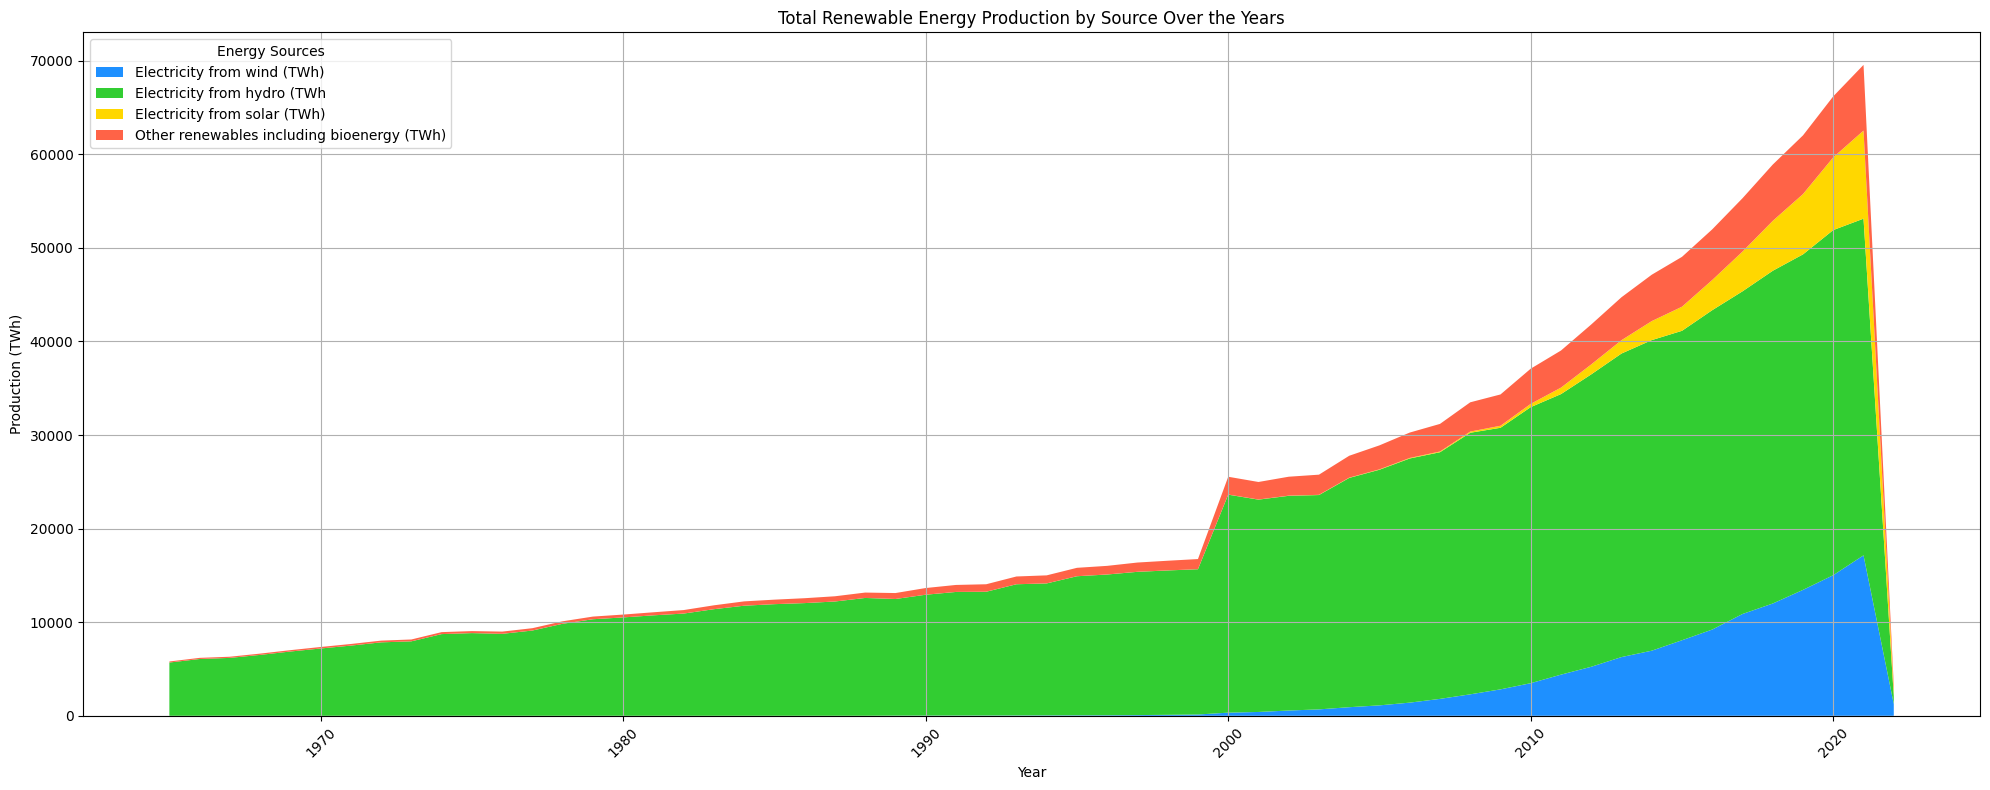

In [38]:
energy_types = ['Electricity from wind (TWh)', 'Electricity from hydro (TWh)', 'Electricity from solar (TWh)', 'Other renewables including bioenergy (TWh)']

total_renewable_by_source_yearly = df_3.groupby('Year')[energy_types].sum().reset_index()

colors = ['dodgerblue', 'limegreen', 'gold', 'tomato']

plt.figure(figsize=(20, 8))
plt.stackplot(total_renewable_by_source_yearly['Year'],
              total_renewable_by_source_yearly['Electricity from wind (TWh)'],
              total_renewable_by_source_yearly['Electricity from hydro (TWh)'],
              total_renewable_by_source_yearly['Electricity from solar (TWh)'],
              total_renewable_by_source_yearly['Other renewables including bioenergy (TWh)'],
              labels=['Electricity from wind (TWh)', 'Electricity from hydro (TWh', 'Electricity from solar (TWh)', 'Other renewables including bioenergy (TWh)'], colors=colors)

plt.title('Total Renewable Energy Production by Source Over the Years')
plt.xlabel('Year')
plt.ylabel('Production (TWh)')
plt.legend(loc='upper left', title='Energy Sources')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-50-98bd86337d1d>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-50-98bd86337d1d>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-50-98bd86337d1d>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-50-98bd86337d1d>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




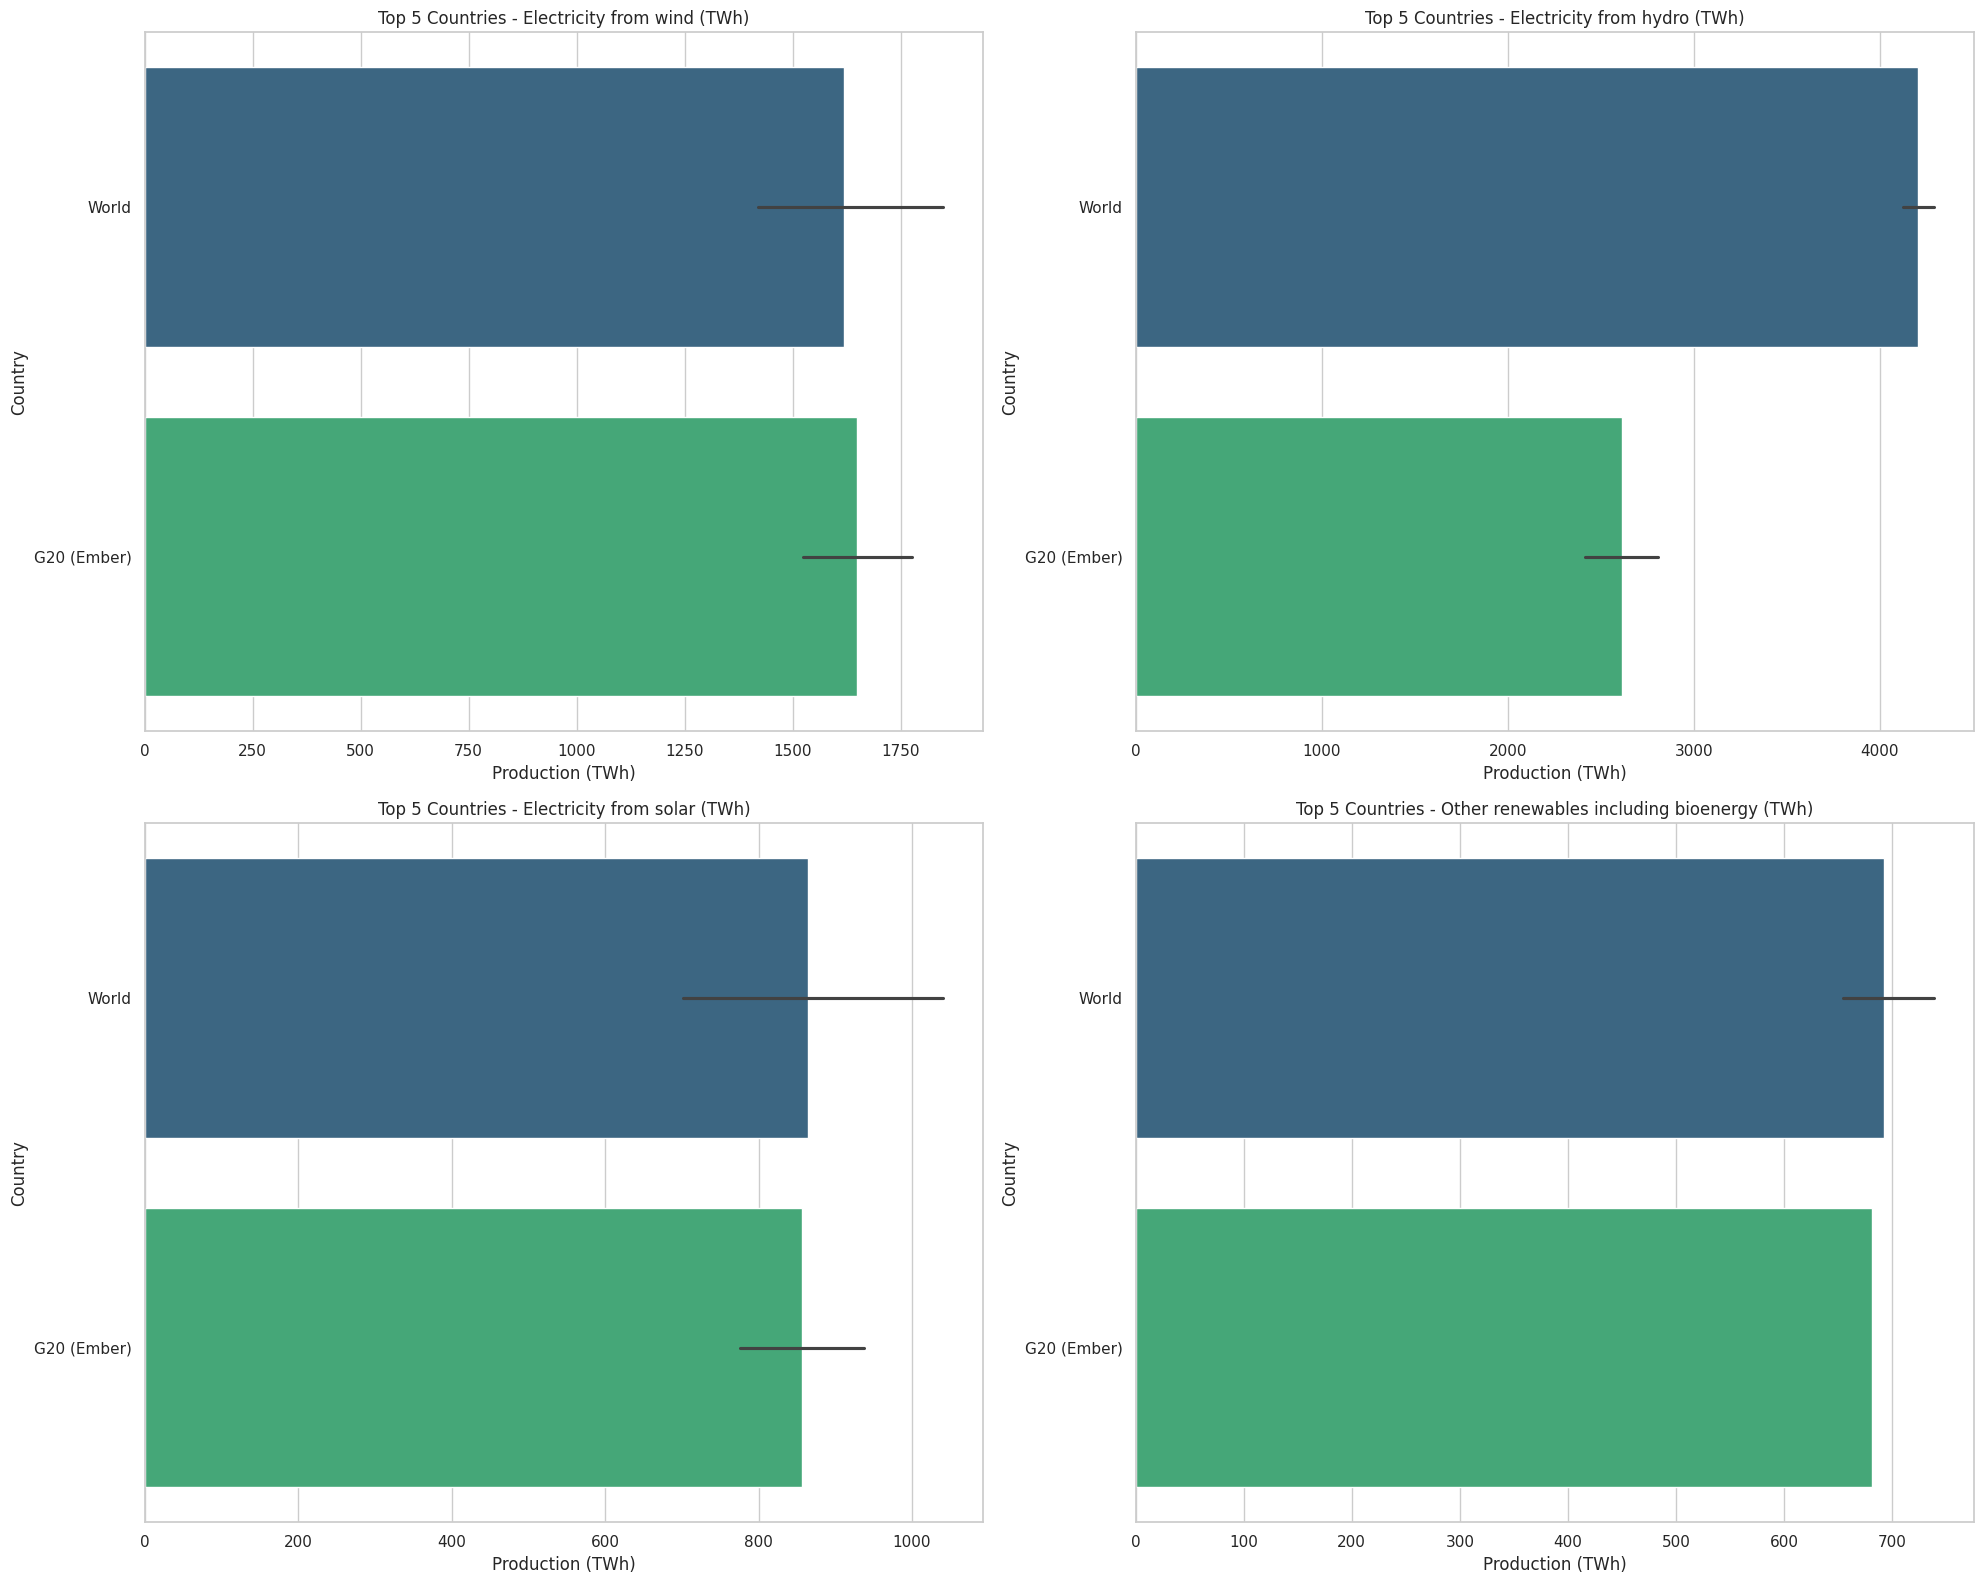

In [50]:
top_countries_by_source = {}
for energy_type in energy_types:
    if energy_type == 'Electricity from hydro (TWh)':  # Only for hydro
        top_countries = df_3.sort_values(by=energy_type, ascending=False).head(5)
        g20_data = df_3[df_3['Entity'] == 'G20 (Ember)']  # Get G20 data
        top_countries = pd.concat([top_countries, g20_data])  # Combine
    else:
        top_countries = df_3.sort_values(by=energy_type, ascending=False).head(5)

    top_countries_by_source[energy_type] = top_countries[['Entity', energy_type]]

# ... (Rest of the plotting code remains the same)

fig, axes = plt.subplots(2, 2, figsize=(20, 16))
for i, (energy_type, df) in enumerate(top_countries_by_source.items()):
    ax = axes[i // 2, i % 2]
    sns.barplot(x=df[energy_type], y=df['Entity'], ax=ax, palette="viridis")
    ax.set_title(f'Top 5 Countries - {energy_type}')
    ax.set_xlabel('Production (TWh)')
    ax.set_ylabel('Country')

plt.tight_layout()
plt.show()

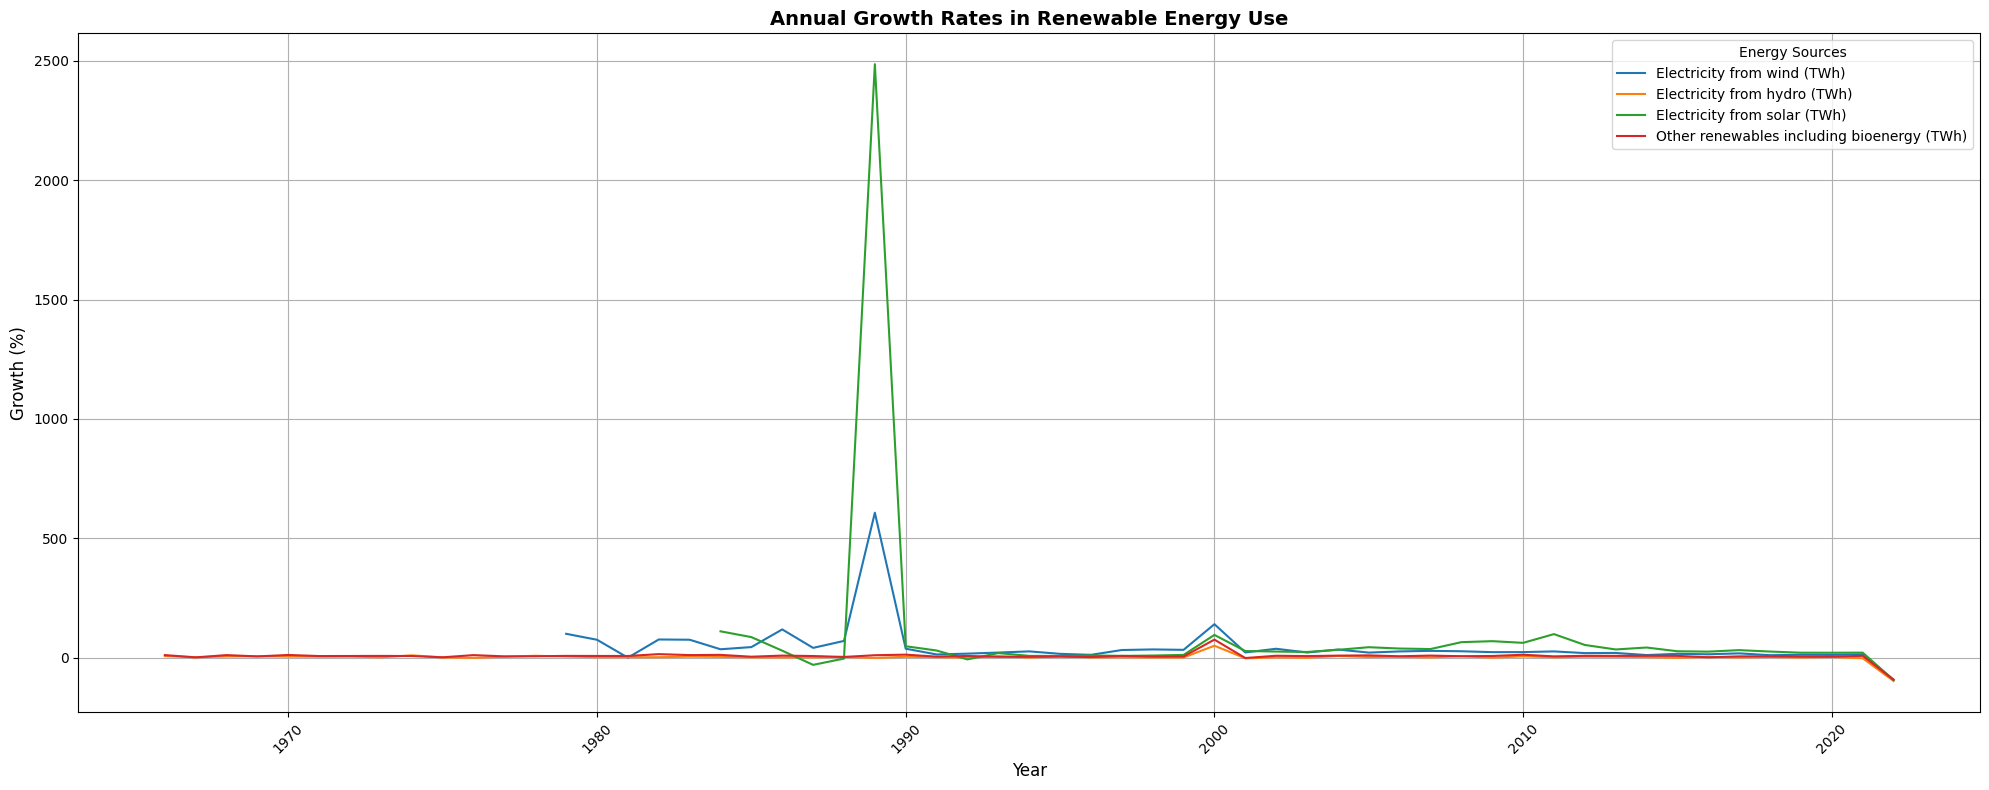

In [40]:
energy_types = ['Electricity from wind (TWh)', 'Electricity from hydro (TWh)',
                'Electricity from solar (TWh)', 'Other renewables including bioenergy (TWh)']

total_renewable_comparison = df_3.groupby('Year')[energy_types].sum()
growth_rates = total_renewable_comparison.pct_change().multiply(100)

plt.figure(figsize=(20, 8))

palette = sns.color_palette("tab10", len(energy_types))

for i, energy_type in enumerate(energy_types):
    sns.lineplot(data=growth_rates, x=growth_rates.index, y=energy_type, label=energy_type, color=palette[i])

plt.title('Annual Growth Rates in Renewable Energy Use', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Growth (%)', fontsize=12)

plt.legend(title='Energy Sources')
plt.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

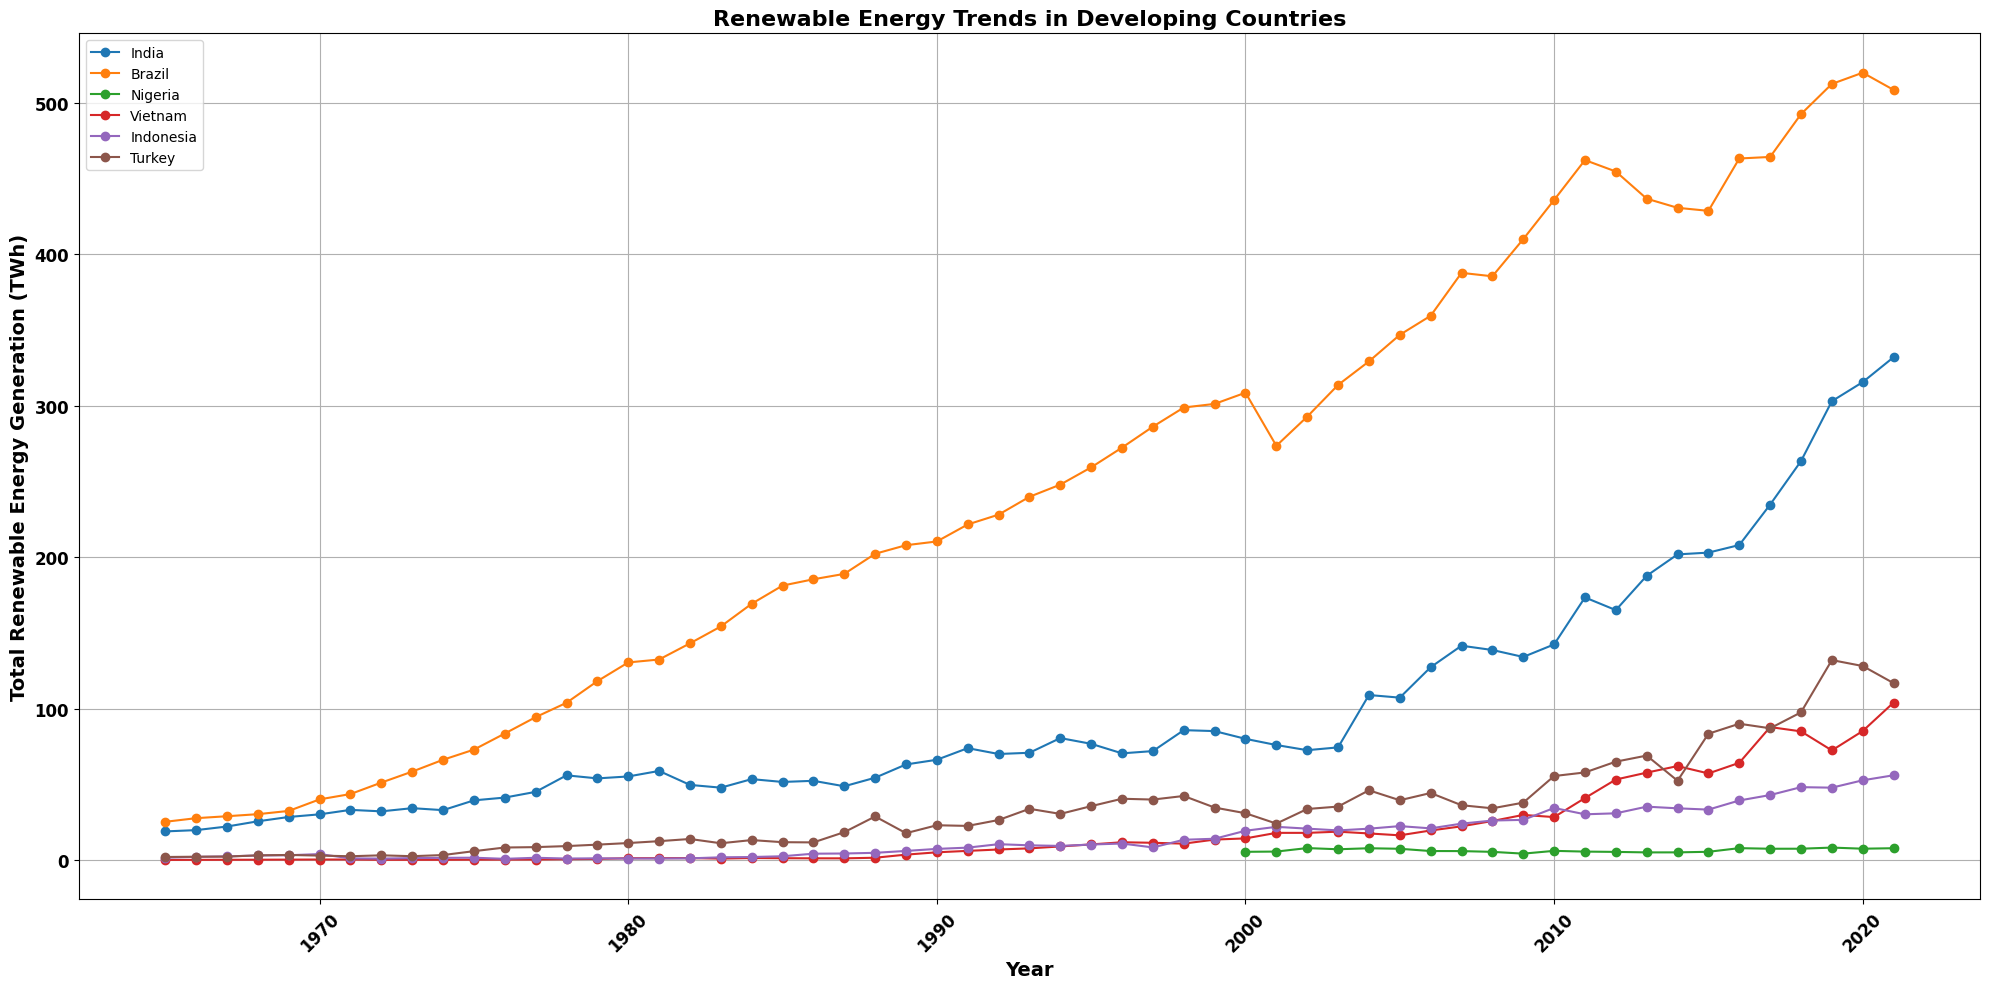

In [41]:
developing_countries = ['India', 'Brazil', 'Nigeria', 'Vietnam', 'Indonesia', 'Turkey']

developing_countries_data = df_3[df_3['Entity'].isin(developing_countries)]

plt.figure(figsize=(20, 10))

for country in developing_countries:
    country_data = developing_countries_data[developing_countries_data['Entity'] == country]
    plt.plot(country_data['Year'], country_data['Total Renewable (TWh)'], label=country, marker='o')
plt.title('Renewable Energy Trends in Developing Countries', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Total Renewable Energy Generation (TWh)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

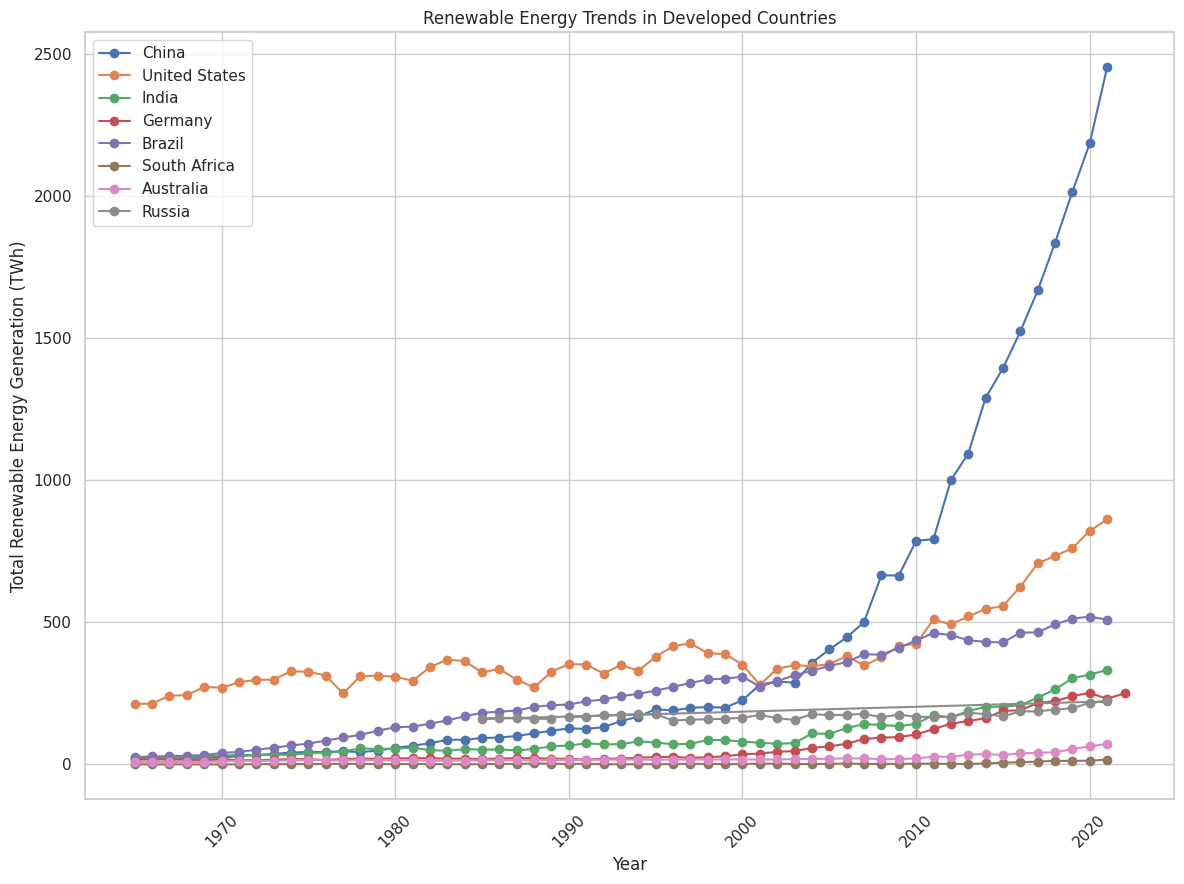

In [51]:
developed_countries = ['China', 'United States', 'India', 'Germany', 'Brazil', 'South Africa', 'Australia', 'Russia']

developed_countries_data = df_3[df_3['Entity'].isin(developed_countries)]

plt.figure(figsize=(12, 9))

for country in developed_countries:
    country_data = developed_countries_data[developed_countries_data['Entity'] == country]
    plt.plot(country_data['Year'], country_data['Total Renewable (TWh)'], label=country, marker='o')

plt.title('Renewable Energy Trends in Developed Countries')
plt.xlabel('Year')
plt.ylabel('Total Renewable Energy Generation (TWh)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [43]:
global_renewable_production = df_3.groupby('Year')[energy_types].sum()

renewable_share = global_renewable_production.div(global_renewable_production.sum(axis=1), axis=0) * 100

colors = px.colors.qualitative.Plotly

fig = px.line(
    renewable_share,
    x=renewable_share.index,
    y=energy_types,
    labels={'index': 'Year', 'value': 'Percentage in Total Production (%)'},
    title='Relationship Between Renewable Energy Sources'
)
for i, energy_type in enumerate(energy_types):
    fig.data[i].line.color = colors[i]

fig.update_layout(legend_title_text='Energy Sources')
fig.show()

In [44]:
turkey_data = df_3[df_3['Entity'] == 'India']

start_year = 2000
end_year = 2023

data_year_range = turkey_data[(turkey_data['Year'] >= start_year) & (turkey_data['Year'] < end_year)]

sources = ['Electricity from wind (TWh)', 'Electricity from hydro (TWh)', 'Electricity from solar (TWh)', 'Other renewables including bioenergy (TWh)']

energy_production = data_year_range[sources].sum()

energy_df = pd.DataFrame({'Source': sources, 'Production': energy_production})
energy_df = energy_df.sort_values(by='Production', ascending=False)
fig = px.bar(
    energy_df,
    x='Source',
    y='Production',
    title=f"India's Electricity Generation by Energy Sources between {start_year}-{end_year-1}",
    labels={'Production': 'Electricity Generation (TWh)'}
)

colors = px.colors.qualitative.Plotly[:len(sources)]
fig.update_traces(marker=dict(color=colors))

fig.show()

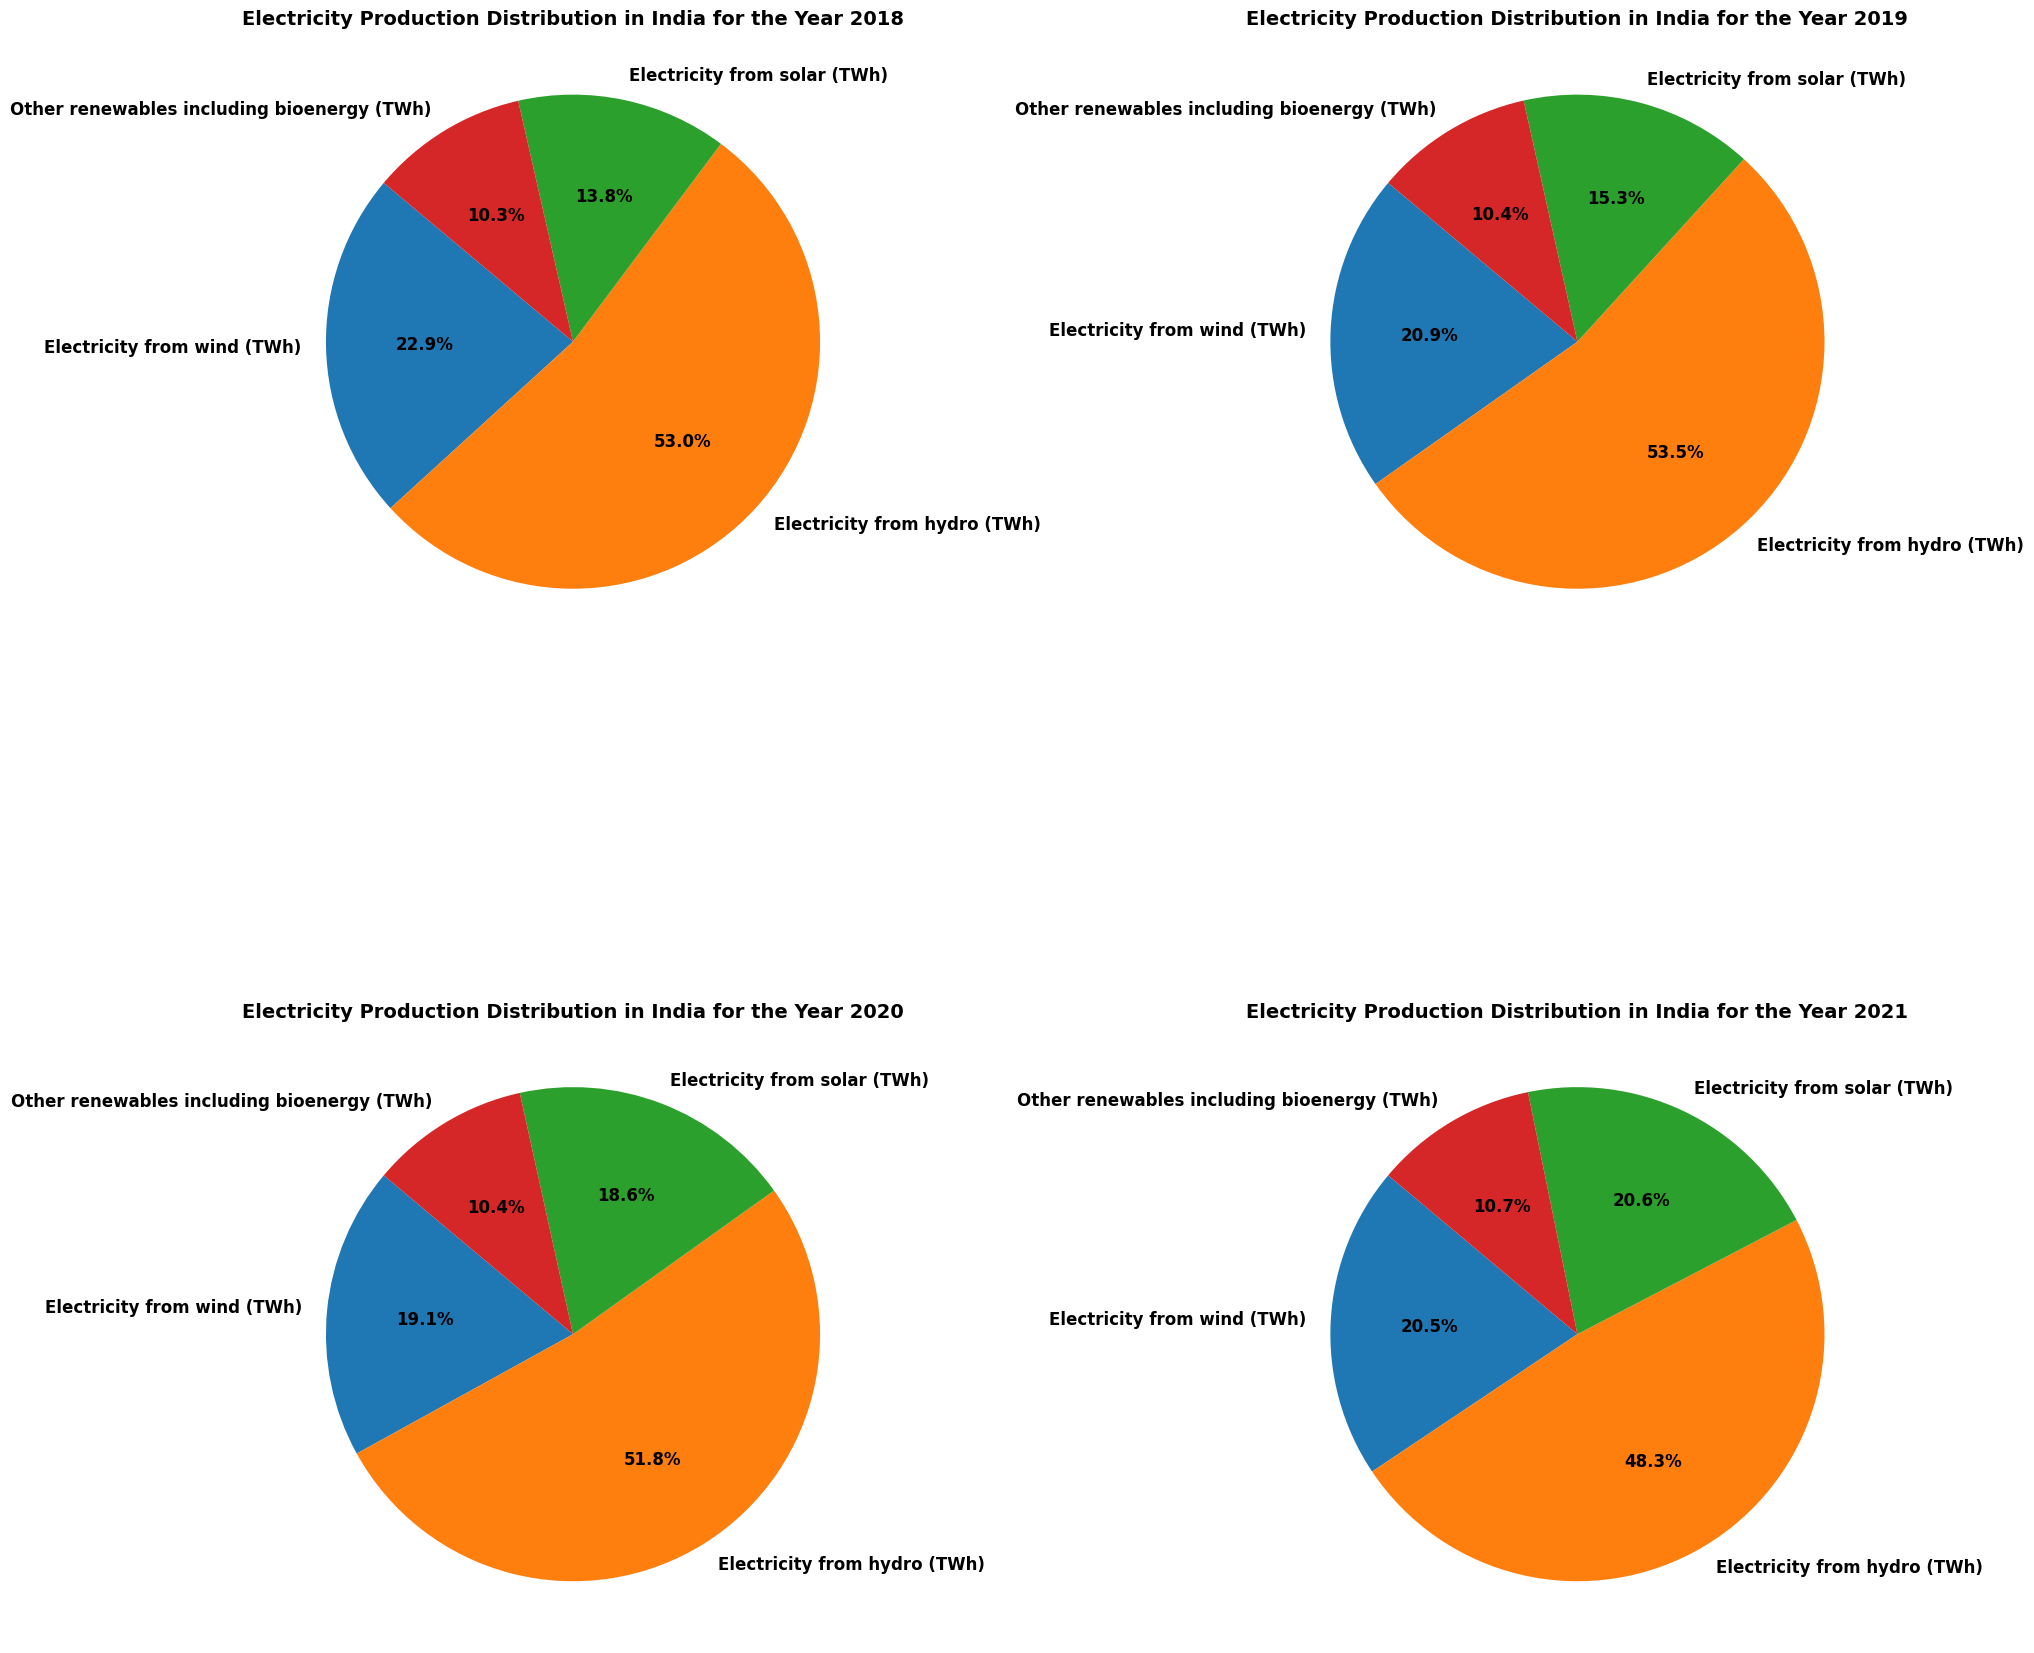

In [45]:
sources = ['Electricity from wind (TWh)', 'Electricity from hydro (TWh)', 'Electricity from solar (TWh)', 'Other renewables including bioenergy (TWh)']

ind_data = df_3[df_3['Entity'] == 'India']

years = [2018, 2019, 2020, 2021]

plt.figure(figsize=(20, 20))
for i, year in enumerate(years):
    data_year = ind_data[ind_data['Year'] == year]
    energy_production = data_year[sources].values[0]
    plt.subplot(2, 2, i+1)
    patches, texts, autotexts = plt.pie(energy_production, labels=sources, autopct='%1.1f%%', startangle=140)

    for text in texts:
        text.set_fontsize(12)
        text.set_weight('bold')
    for autotext in autotexts:
        autotext.set_fontsize(12)
        autotext.set_weight('bold')

    plt.title(f'Electricity Production Distribution in India for the Year {year}', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [46]:
renewable_sources = ['Electricity from wind (TWh)', 'Electricity from hydro (TWh)', 'Electricity from solar (TWh)', 'Other renewables including bioenergy (TWh)']
selected_year = 2021
countries = ['Turkey', 'Germany', 'United Kingdom', 'Greece', 'France', 'Italy', 'Spain', 'Netherlands', 'Sweden', 'Poland', 'Portugal','India']

filtered_data = df_3[(df_3['Year'] == selected_year) & (df_3['Entity'].isin(countries))]

fig = px.bar(filtered_data, x='Entity', y=renewable_sources,
             title=f'Comparison of Electricity Generation in European Countries vs India in {selected_year}',
             labels={'Entity': 'Countries', 'value': 'Electricity Generation (TWh)'},
             color_discrete_sequence=['green', 'blue', 'yellow', 'brown'])
fig.update_layout(xaxis_tickangle=-45, xaxis_title=None, yaxis_title='Electricity Generation (TWh)',
                  title_font=dict(size=20))

fig.show()

In [47]:
selected_year = 2021
neighboring_countries = ['India', 'Pakistan', 'Afganistan', 'China', 'Nepal', 'Bangladesh']
renewable_sources = ['Electricity from wind (TWh)', 'Electricity from hydro (TWh)', 'Electricity from solar (TWh)', 'Other renewables including bioenergy (TWh)']

filtered_data = df_3[(df_3['Year'] == selected_year) & (df_3['Entity'].isin(neighboring_countries))]

colors = ['green', 'blue', 'yellow', 'brown']
fig = px.bar(filtered_data, x='Entity', y=renewable_sources,
             title=f'Comparison of India\'s Electricity Generation with Its Neighboring Countries in {selected_year}',
             labels={'Entity': 'Countries', 'value': 'Electricity Generation (TWh)'},
             color_discrete_sequence=colors)

fig.update_layout(xaxis_tickangle=-45, xaxis_title=None, yaxis_title='Electricity Generation (TWh)',
                  title_font=dict(size=20))

fig.show()

In [48]:
energy_sources = ['Electricity from wind (TWh)', 'Electricity from hydro (TWh)',
                  'Electricity from solar (TWh)', 'Other renewables including bioenergy (TWh)']

total_generation = df_3[energy_sources].sum()
total_generation = total_generation.sort_values(ascending=False)

total_generation_df = pd.DataFrame({'Energy Source': total_generation.index, 'Electricity Generation (TWh)': total_generation.values})

colors = {
    'Electricity from wind (TWh)': 'green',
    'Electricity from hydro (TWh)': 'blue',
    'Electricity from solar (TWh)': 'yellow',
    'Other renewables including bioenergy (TWh)': 'brown',
}

total_generation_df['Color'] = total_generation_df['Energy Source'].map(colors)

fig = px.bar(total_generation_df, x='Energy Source', y='Electricity Generation (TWh)',
             title='Electricity Generation by Energy Sources',
             labels={'Energy Source': 'Energy Source', 'Electricity Generation (TWh)': 'Electricity Generation (TWh)'},
             color='Color')
fig.update_layout(title_font=dict(size=20),
                  xaxis_title_font=dict(size=16),
                  yaxis_title_font=dict(size=16))

fig.show()

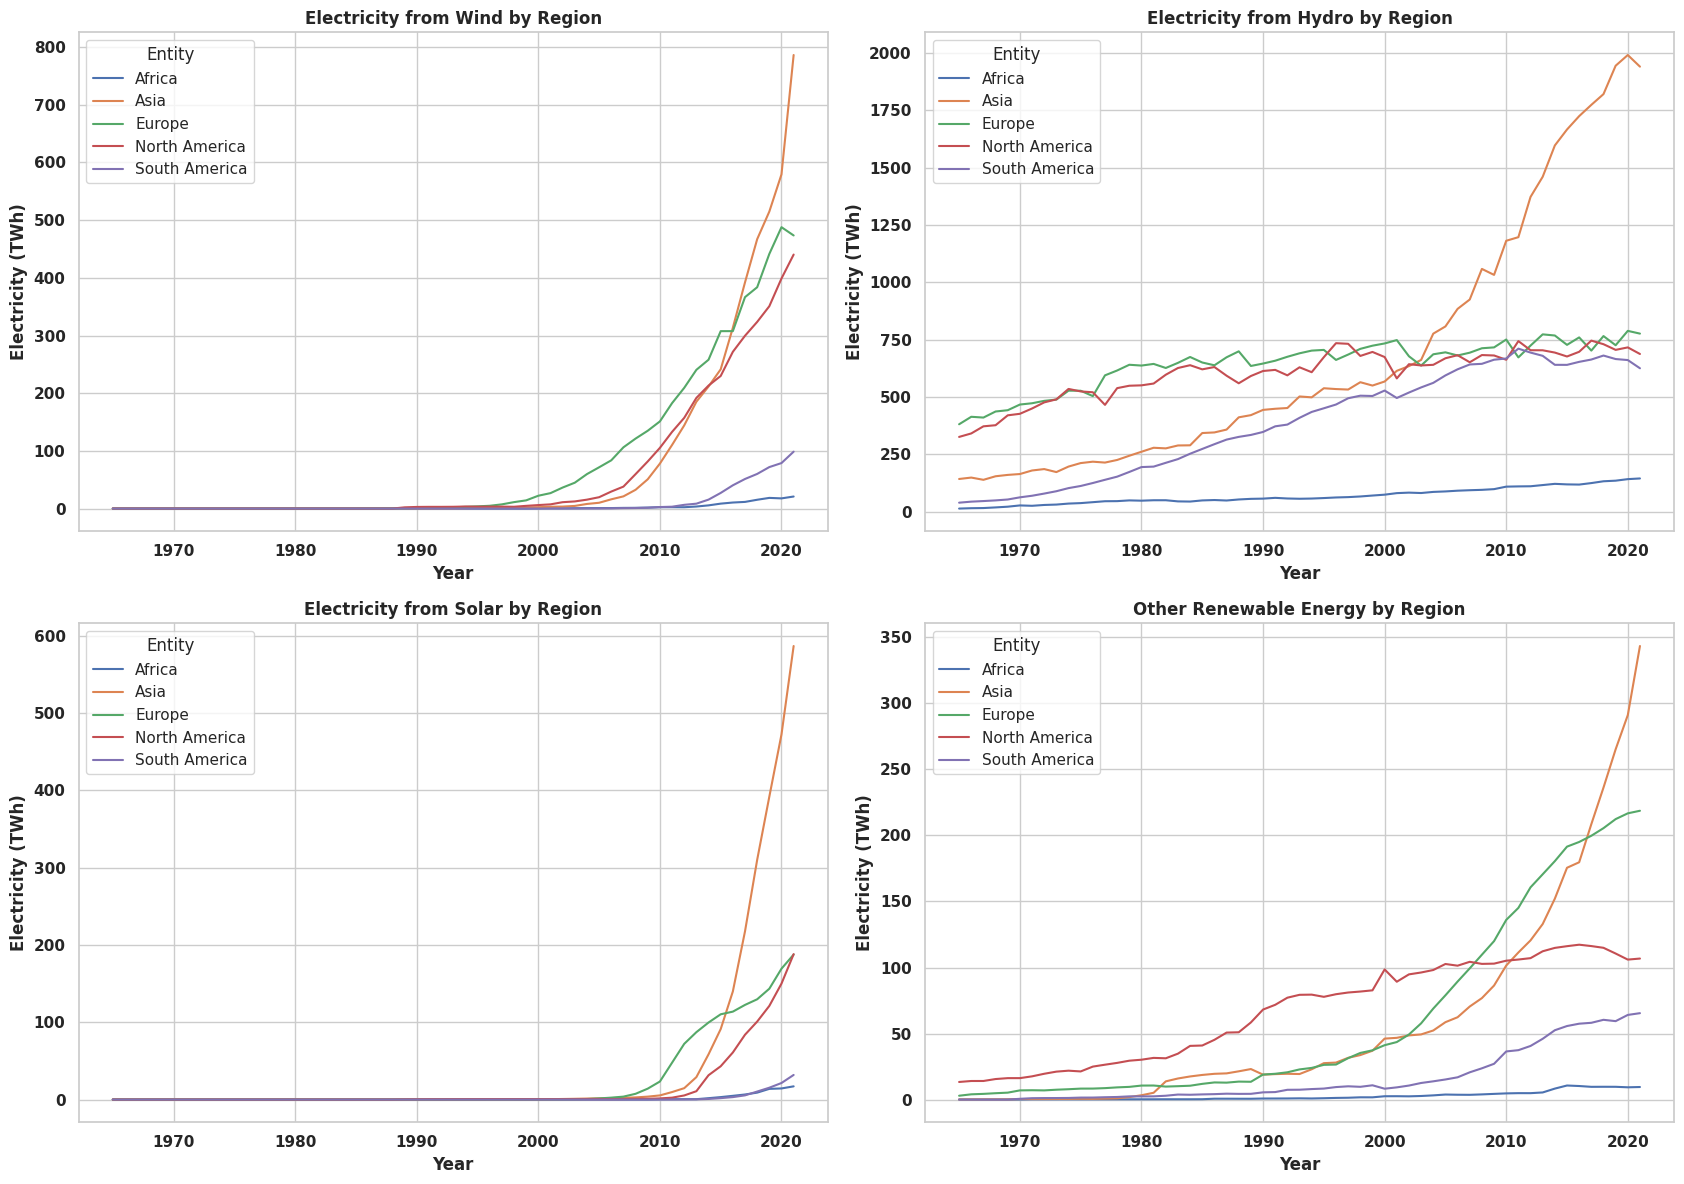

In [52]:
selected_regions = ['Africa', 'Asia', 'Europe', 'North America', 'South America']
filtered_data = df_3[df_3['Entity'].isin(selected_regions)]

grouped_data = filtered_data.groupby(['Year', 'Entity']).sum().reset_index()

sns.set(style="whitegrid")
plt.figure(figsize=(17, 12))

plt.subplot(2, 2, 1)
sns.lineplot(data=grouped_data, x='Year', y='Electricity from wind (TWh)', hue='Entity')
plt.title('Electricity from Wind by Region', fontweight='bold')
plt.ylabel('Electricity (TWh)', fontweight='bold')
plt.xlabel('Year', fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.subplot(2, 2, 2)
sns.lineplot(data=grouped_data, x='Year', y='Electricity from hydro (TWh)', hue='Entity')
plt.title('Electricity from Hydro by Region', fontweight='bold')
plt.ylabel('Electricity (TWh)', fontweight='bold')
plt.xlabel('Year', fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.subplot(2, 2, 3)
sns.lineplot(data=grouped_data, x='Year', y='Electricity from solar (TWh)', hue='Entity')
plt.title('Electricity from Solar by Region', fontweight='bold')
plt.ylabel('Electricity (TWh)', fontweight='bold')
plt.xlabel('Year', fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.subplot(2, 2, 4)
sns.lineplot(data=grouped_data, x='Year', y='Other renewables including bioenergy (TWh)', hue='Entity')
plt.title('Other Renewable Energy by Region', fontweight='bold')
plt.ylabel('Electricity (TWh)', fontweight='bold')
plt.xlabel('Year', fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.tight_layout()
plt.show()